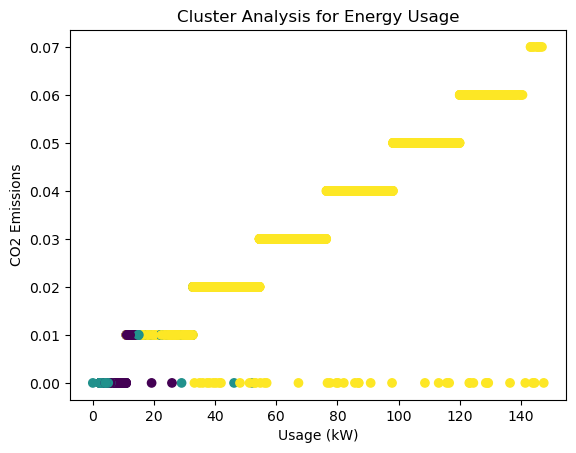

Mean Squared Error: 15.004346602870838
CO2(tCO2): 0.9661572485113403
Lagging_Current_Power_Factor: 0.015518690462007753
Leading_Current_Power_Factor: 0.008576547946170836
NSM: 0.008151923177905312
WeekStatus: 0.000694101754533372
Load_Type: 0.0009014881480425325
Current Avg Usage in Inefficient Cluster: 66.2193660765277 kW
Optimized Target Usage: 33.10968303826385 kW
                     date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0     2018-01-01 00:15:00       3.17                                  2.95   
1     2018-01-01 00:30:00       4.00                                  4.46   
2     2018-01-01 00:45:00       3.24                                  3.28   
3     2018-01-01 01:00:00       3.31                                  3.56   
4     2018-01-01 01:15:00       3.82                                  4.50   
...                   ...        ...                                   ...   
33211 2018-12-12 23:00:00       4.21                                  3.31   
33212 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('Steel_industry_data.csv')

# Preprocessing: Handle missing or incorrect data
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Fix date formatting
data = data.dropna()  # Drop rows with missing values

# Feature Engineering: Convert categorical variables to numerical
data['WeekStatus'] = data['WeekStatus'].apply(lambda x: 1 if x == 'Weekday' else 0)
data['Load_Type'] = data['Load_Type'].apply(lambda x: 1 if x == 'Light_Load' else 0)

# Standardize numerical features for clustering
features = ['Usage_kWh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Step 1: Clustering to identify inefficiencies
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.scatter(data['Usage_kWh'], data['CO2(tCO2)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Usage (kW)')
plt.ylabel('CO2 Emissions')
plt.title('Cluster Analysis for Energy Usage')
plt.show()

# Step 2: Train Regression Models to Predict and Optimize Energy Consumption
X = data[['CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Load_Type']]
y = data['Usage_kWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance
importance = model.feature_importances_
for i, col in enumerate(X.columns):
    print(f"{col}: {importance[i]}")

# Step 3: Optimization
# Find inefficient clusters and suggest improvements
inefficient_cluster = data[data['Cluster'] == data['Cluster'].max()]  # Assuming the highest cluster is least efficient
avg_usage = inefficient_cluster['Usage_kWh'].mean()
optimized_usage = avg_usage * 0.5  # Target a 50% reduction

print(f"Current Avg Usage in Inefficient Cluster: {avg_usage} kW")
print(f"Optimized Target Usage: {optimized_usage} kW")

# Recommendations:
# - Focus on Load_Type values with the highest inefficiency.
# - Adjust operational hours to non-peak NSM values.
# - Improve power factor by balancing Lagging_C and Leading_C.
# - Replace equipment with high CO2 emissions in the identified cluster.

# Save insights
data.to_csv('optimized_resource_usage.csv', index=False)
print(data)


Measures of Central Tendency:
Mean of Usage (kWh): 27.74799479166667
Median of Usage (kWh): 4.57
Mode of Usage (kWh): 3.06

Correlation Matrix:
                                         date  Usage_kWh  \
date                                 1.000000   0.074347   
Usage_kWh                            0.074347   1.000000   
Lagging_Current_Reactive.Power_kVar  0.077267   0.901565   
Leading_Current_Reactive_Power_kVar -0.061768  -0.317518   
CO2(tCO2)                            0.082968   0.982978   
Lagging_Current_Power_Factor        -0.007434   0.402954   
Leading_Current_Power_Factor         0.082834   0.341754   
NSM                                  0.002747   0.243597   

                                     Lagging_Current_Reactive.Power_kVar  \
date                                                            0.077267   
Usage_kWh                                                       0.901565   
Lagging_Current_Reactive.Power_kVar                             1.000000   
Leading_Cur

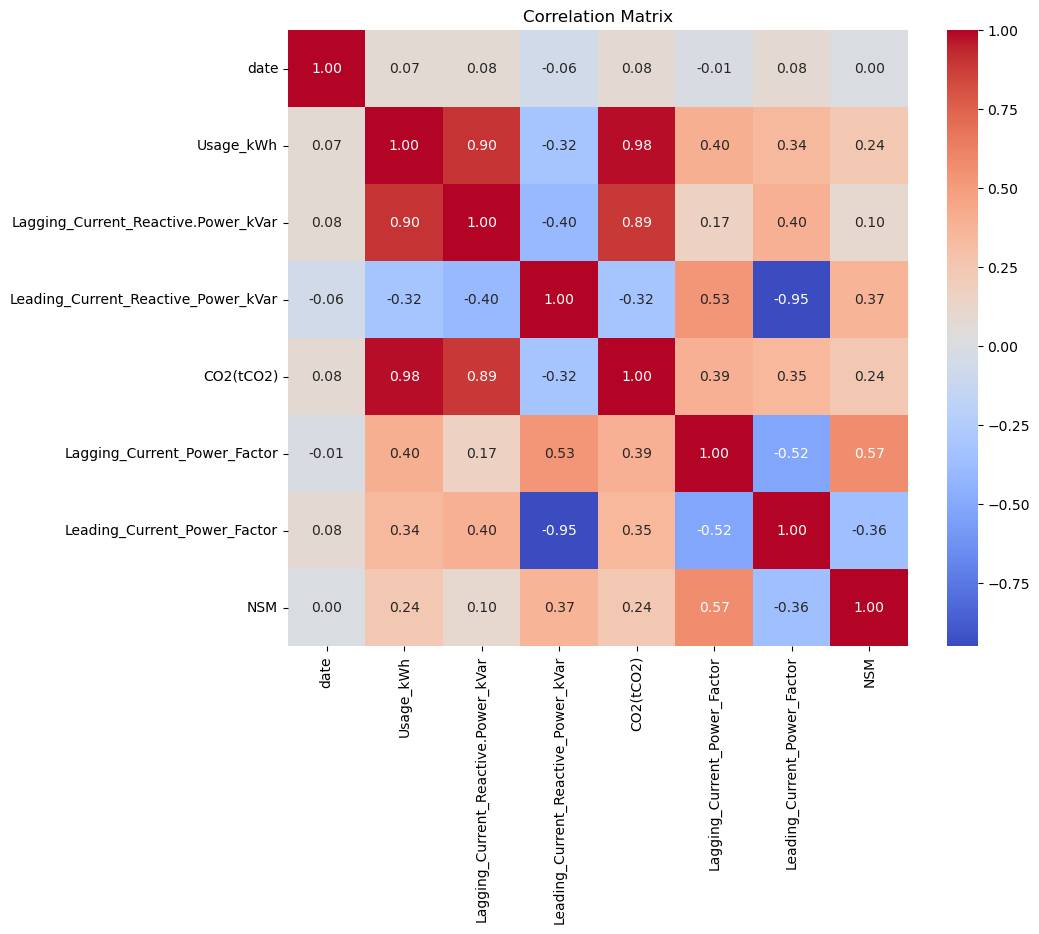

KeyError: ''

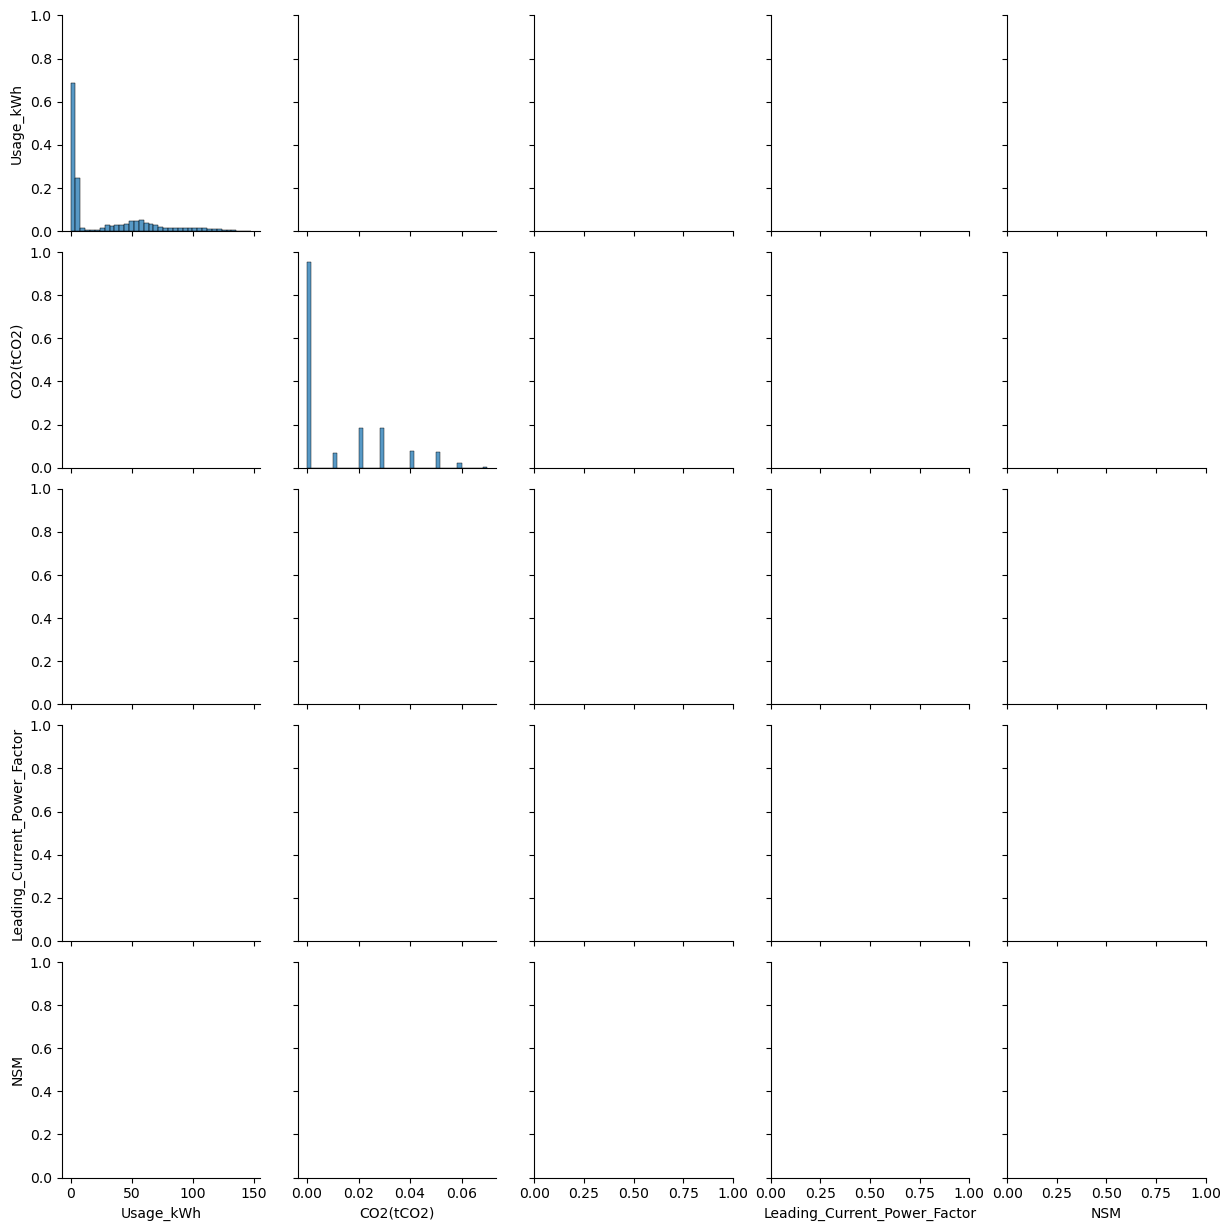

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('Steel_industry_data.csv')

# Ensure the date column is parsed correctly
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna()  # Remove rows with missing values

# Measures of Central Tendency
print("Measures of Central Tendency:")
print("Mean of Usage (kWh):", data['Usage_kWh'].mean())
print("Median of Usage (kWh):", data['Usage_kWh'].median())
print("Mode of Usage (kWh):", data['Usage_kWh'].mode()[0])

# Step 1: Correlation Analysis
correlation = data.corr()
print("\nCorrelation Matrix:")
print(correlation)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Step 2: Pairwise Relationship with Energy Consumption
sns.pairplot(data, vars=['Usage_kWh', 'CO2(tCO2)', '', 'Leading_Current_Power_Factor', 'NSM'], kind='scatter')
plt.suptitle("Pairwise Relationships with Energy Consumption", y=1.02)
plt.show()

# Step 3: Reduce Energy Consumption by 50%
data['Optimized_Usage_kWh'] = data['Usage_kWh'] * 0.5

# Recalculate correlations for reduced energy consumption
correlation_reduced = data.corr()
print("\nCorrelation Matrix (After 50% Reduction in Energy Consumption):")
print(correlation_reduced)

# Visualize the Updated Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_reduced, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Reduced Energy Consumption)")
plt.show()

# Step 4: Clustering Analysis
features = ['Usage_kWh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Usage_kWh'], y=data['CO2(tCO2)'], hue=data['Cluster'], palette='viridis')
plt.title("Clusters Based on Energy Consumption and CO2 Emissions")
plt.xlabel("Usage (kWh)")
plt.ylabel("CO2 Emissions")
plt.show()

# Visualize Clusters for Optimized Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Optimized_Usage_kWh'], y=data['CO2(tCO2)'], hue=data['Cluster'], palette='cool')
plt.title("Clusters (After Reducing Energy Consumption by 50%)")
plt.xlabel("Optimized Usage (kW)")
plt.ylabel("CO2 Emissions")
plt.show()

# Step 5: Graphical Representation of Measures of Central Tendency
plt.figure(figsize=(8, 6))
sns.histplot(data['Usage_kWh'], kde=True, color='blue', bins=20, label='Original Usage')
sns.histplot(data['Optimized_Usage_kW'], kde=True, color='orange', bins=20, label='Optimized Usage')
plt.axvline(data['Usage_kWh'].mean(), color='blue', linestyle='--', label='Mean (Original)')
plt.axvline(data['Optimized_Usage_kW'].mean(), color='orange', linestyle='--', label='Mean (Optimized)')
plt.title("Energy Usage Distribution (Original vs Optimized)")
plt.xlabel("Usage (kW)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
